In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import glob as glob # glob is used to search/locate any file present in the system
import shutil #Used for moving files from one folder to another
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2 as cv
import warnings
warnings.filterwarnings('ignore')

In [5]:
base_dir=r"C:/Users/Shirshak/Dataset1"

In [6]:
import hashlib

def del_shw_RepIm(path):
            os.chdir(path)
            files_list = os.listdir()
            duplicates = []
            hash_keys = dict()
            for index, filename in  enumerate(os.listdir('.')):  #listdir('.') = current directory
                 if os.path.isfile(filename):
                    with open(filename, 'rb') as f:
                        filehash = hashlib.md5(f.read()).hexdigest()

                    if filehash not in hash_keys: 
                        hash_keys[filehash] = index
                        if del_corupted_images(path+'/'+ filename) != 1 :
                            filepaths.append(path +'/'+ filename)
                            labels.append(lab)
                        
                    else:
                         duplicates.append((index,hash_keys[filehash]))

            for file_indexes in duplicates:
                try:
                        plt.subplot(121),plt.imshow(plt.imread(files_list[file_indexes[1]]))
                        plt.title(file_indexes[1]), plt.xticks([]), plt.yticks([])
                    
                        plt.subplot(122),plt.imshow(plt.imread(files_list[file_indexes[0]]))
                        plt.title(str(file_indexes[0]) + ' duplicate'), plt.xticks([]), plt.yticks([])
                        plt.show()
                except OSError as e:
                        print(error)
                        continue

In [7]:
def del_corupted_images(filename):
    del_count = 0     
    if os.path.isfile(filename):
        try:
            fobj = open(filename,'rb')
            is_JFIF =  b'JFIF' in fobj.peek(10)
        finally:
            fobj.close()
        if not is_JFIF:
            del_count += 1
    
                 
    return del_count  

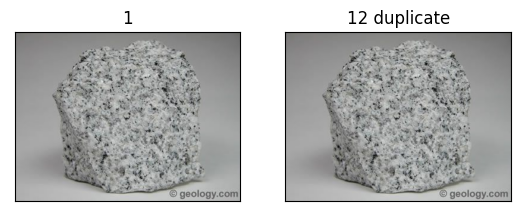

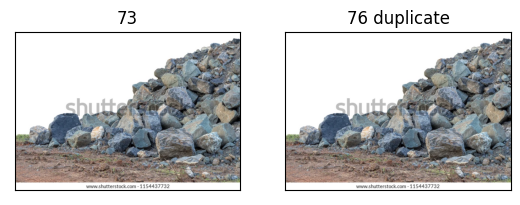

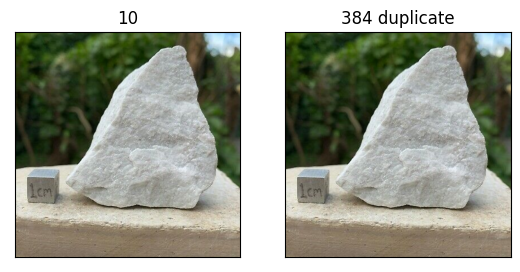

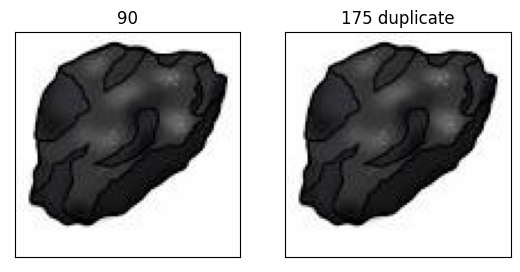

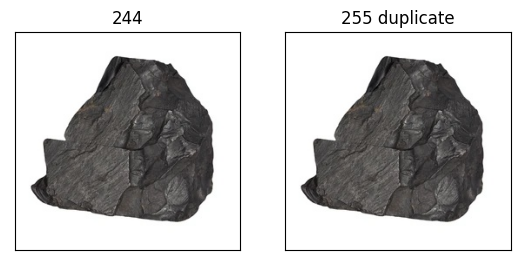

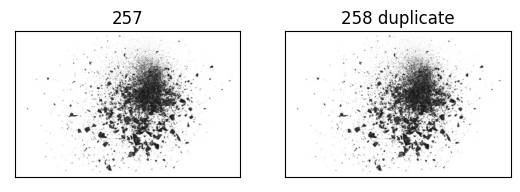

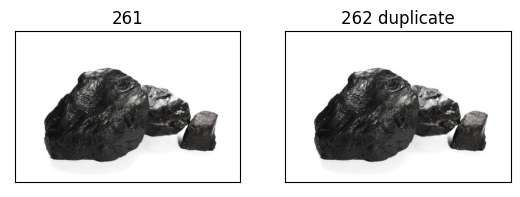

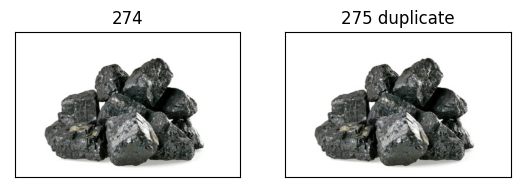

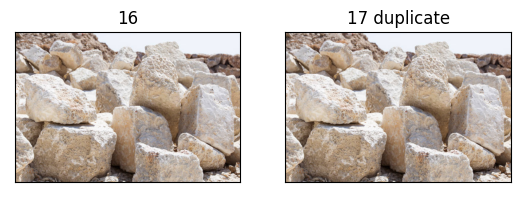

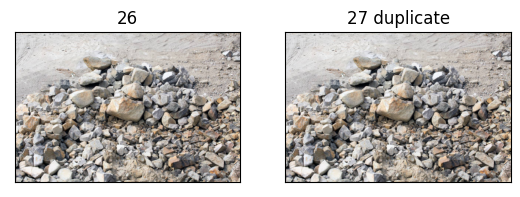

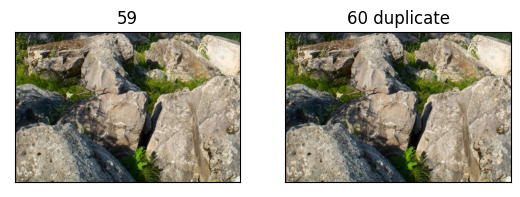

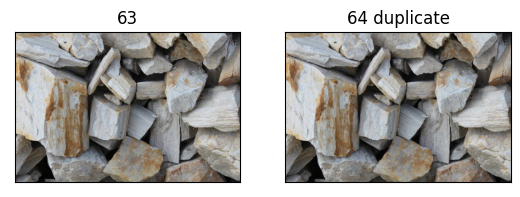

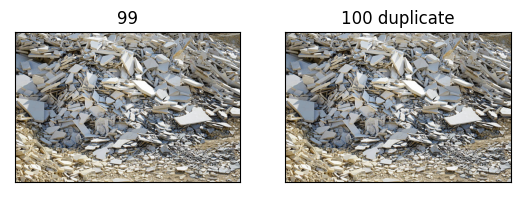

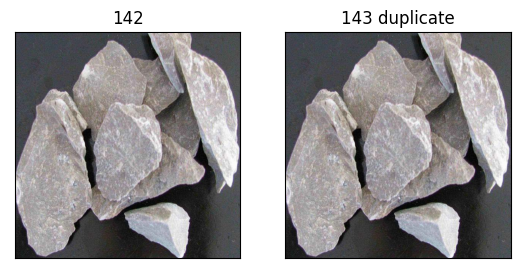

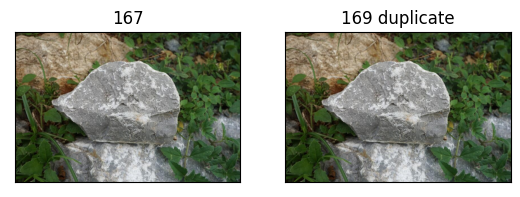

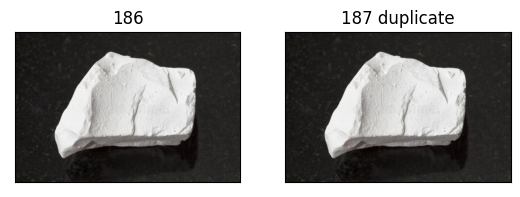

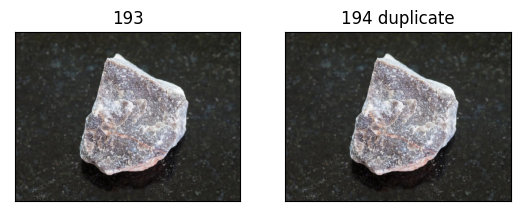

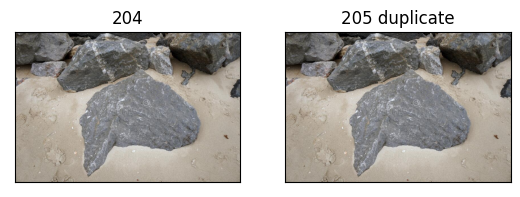

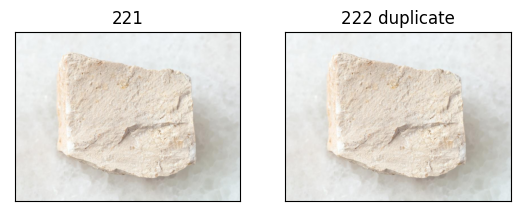

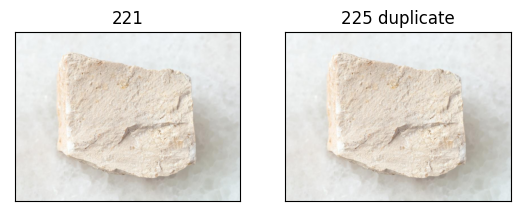

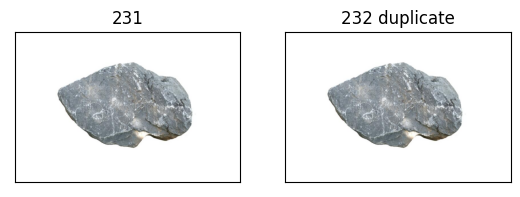

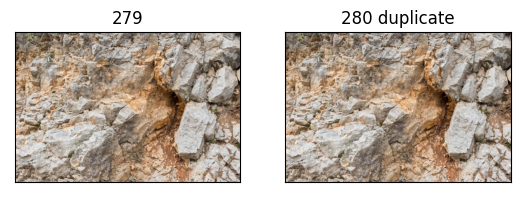

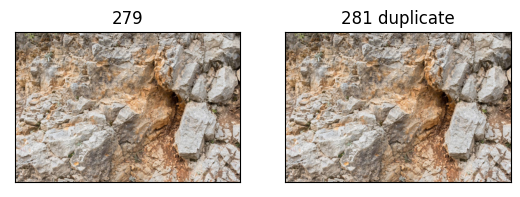

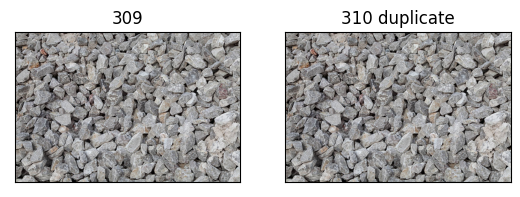

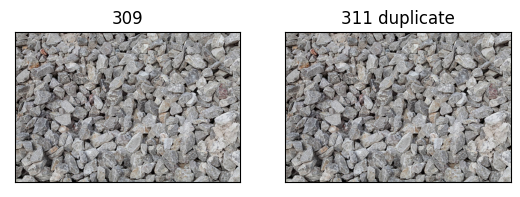

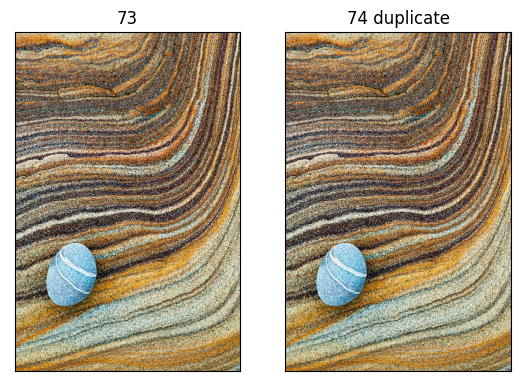

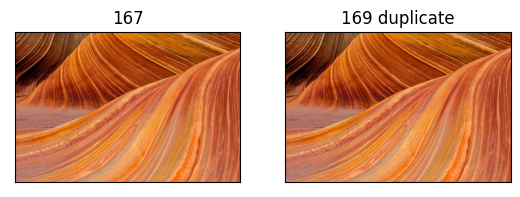

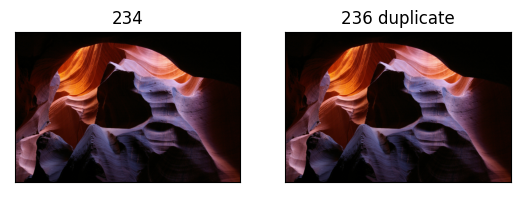

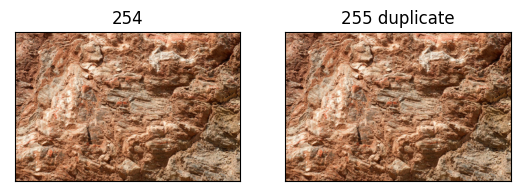

In [8]:
path='/kaggle/input/rock-classification/Dataset'
filepaths=[]
labels=[]
for sub_path in os.listdir(base_dir):
        for lab in os.listdir(base_dir+'/'+sub_path):
            del_shw_RepIm(base_dir+'/'+sub_path+'/'+lab)

In [9]:
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))
pd.Series(labels).value_counts()

filepaths:  1916    labels:  1916


Quartzite    473
Marble       383
Coal         349
Sandstone    317
Limestone    257
Basalt        72
Granite       65
dtype: int64

In [10]:
# please note this package - imagededup was custom-installed in this kernel 
from imagededup.methods import CNN
from imagededup.utils import plot_duplicates
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
cnn = CNN()

2023-04-28 17:55:44,515: INFO Initialized: MobileNet v3 pretrained on ImageNet dataset sliced at GAP layer
2023-04-28 17:55:44,515: INFO Device set to cpu ..


In [73]:
for sub_path in os.listdir(base_dir):
        for lab in os.listdir(base_dir+'/'+sub_path):
                dir=base_dir+'/'+sub_path+'/'+lab
                encodings = cnn.encode_images(image_dir=dir)
                duplicate = cnn.find_duplicates_to_remove(image_dir=dir,min_similarity_threshold=0.9499) 
                for indx , path_img in enumerate(filepaths):
                    if path_img.split('/')[-2] == lab :
                          for  namImg in duplicate :
                                 if dir+'/'+namImg == path_img:
                                    filepaths.pop(indx )
                                    labels.pop(indx )

2023-03-22 14:58:27,089: INFO Start: Image encoding generation
2023-03-22 14:58:29,547: INFO End: Image encoding generation
2023-03-22 14:58:29,746: INFO Start: Image encoding generation
2023-03-22 14:58:32,161: INFO End: Image encoding generation
2023-03-22 14:58:32,334: INFO Start: Calculating cosine similarities...
2023-03-22 14:58:32,355: INFO End: Calculating cosine similarities.
2023-03-22 14:58:32,355: INFO Start: Image encoding generation
2023-03-22 14:58:35,113: INFO End: Image encoding generation
2023-03-22 14:58:35,258: INFO Start: Image encoding generation
2023-03-22 14:58:38,134: INFO End: Image encoding generation
2023-03-22 14:58:38,305: INFO Start: Calculating cosine similarities...
2023-03-22 14:58:38,305: INFO End: Calculating cosine similarities.
2023-03-22 14:58:38,316: INFO Start: Image encoding generation
2023-03-22 14:58:49,729: INFO End: Image encoding generation
2023-03-22 14:58:50,502: INFO Start: Image encoding generation
2023-03-22 14:58:56,921: INFO End: Im

In [74]:
print ('filepaths: ', len(filepaths), '   labels: ', len(labels)) 

filepaths:  1871    labels:  1871


In [75]:
pth= r'C:\Users\Shirshak\dataset_roorkee'
#os.chdir('/kaggle/working/')
# if os.path.isfile(pth) == 0:
#     os.mkdir(pth)

In [1]:
classes = ['Basalt' ,'Granite' , 'Marble' ,'Quartzite'  , 'Coal'  , 'Sandstone' , 'Limestone']
for cls in classes:
    if os.path.isfile(pth+'/'+cls) == 0 :
        os.mkdir(pth+'/'+cls)

In [77]:
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))

filepaths:  1871    labels:  1871


In [79]:
import os
import shutil

src_path = base_dir
dst_path = pth



# # Move each jpg file to the destination directory
# for file in filepaths:
#     x = file.split('/')[-2:]
#     shutil.copy(file , os.path.join(dst_path,x[0]+'/'+x[1]))

In [80]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dst_path,validation_split=0.2,
    subset='training',
    labels='inferred',
    label_mode='categorical',
    image_size=[224, 224],
    seed=123,
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dst_path,validation_split=0.2,
    subset='validation',
    labels='inferred',
    label_mode='categorical',
    image_size=[224, 224],
    seed=123,
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    train_ds
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    valid_ds
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Found 1865 files belonging to 7 classes.
Using 1492 files for training.
Found 1865 files belonging to 7 classes.
Using 373 files for validation.


In [22]:
def PlotImg(image):
    current_image=np.array(image)
    current_image = current_image.reshape(224,224,3) 
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


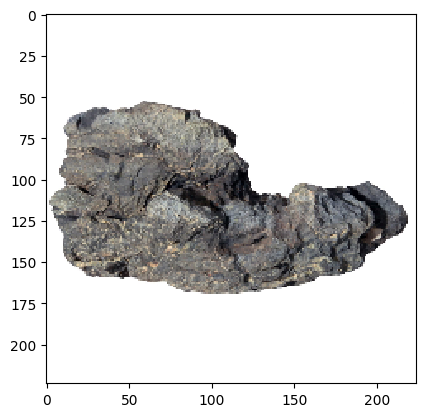

In [23]:
img=[val_generator[0][0][0]]
PlotImg(img)

In [3]:
def model_func():
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(16,(3,3),strides=1,padding='same',input_shape=(224,224,3),activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Conv2D(32,(3,3),strides=1,padding='same',activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Conv2D(64,(3,3),strides=1,padding='same',activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128,activation='relu'))
    model.add(tf.keras.layers.Dense(7,activation='softmax'))
    
    return model

In [4]:
model=model_func()
# model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# model.summary()

In [31]:
callbacks=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=6,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
history=model.fit(train_ds,epochs=50,validation_data=valid_ds,callbacks=callbacks)

Epoch 1/50
24/24 [==============================] - 4s 113ms/step - loss: 271.6357 - accuracy: 0.2641 - val_loss: 1.0841 - val_accuracy: 0.6971
Epoch 2/50
24/24 [==============================] - 3s 116ms/step - loss: 1.5413 - accuracy: 0.4357 - val_loss: 1.3943 - val_accuracy: 0.4745
Epoch 3/50
24/24 [==============================] - 3s 112ms/step - loss: 1.2072 - accuracy: 0.5469 - val_loss: 0.8466 - val_accuracy: 0.7239
Epoch 4/50
24/24 [==============================] - 3s 112ms/step - loss: 0.9145 - accuracy: 0.6629 - val_loss: 0.8455 - val_accuracy: 0.7265
Epoch 5/50
24/24 [==============================] - 3s 112ms/step - loss: 0.6605 - accuracy: 0.7601 - val_loss: 0.6452 - val_accuracy: 0.7855
Epoch 6/50
24/24 [==============================] - 3s 114ms/step - loss: 0.5057 - accuracy: 0.8123 - val_loss: 0.6718 - val_accuracy: 0.7748
Epoch 7/50
24/24 [==============================] - 3s 113ms/step - loss: 0.4971 - accuracy: 0.8405 - val_loss: 0.7616 - val_accuracy: 0.8525
Epoc

In [32]:
model.evaluate(valid_ds)

6/6 [==============================] - 1s 109ms/step - loss: 0.4692 - accuracy: 0.9249


[0.4691508114337921, 0.9249329566955566]

In [5]:
model.save_weights('./checkpoints/roorkee_checkpoint')

In [6]:
model.load_weights('./checkpoints/roorkee_checkpoint')

In [13]:
import cv2 as cv

In [61]:
img=cv.imread(r"C:\Users\Shirshak\roorkee_test\img2.jpg")
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
img=cv.resize(img,(224,224))
img=np.reshape(img,(1,224,224,3))
img = tf.image.convert_image_dtype(img, dtype=tf.float32)

In [62]:
model.predict(img)

array([[0.15073581, 0.16493572, 0.12126336, 0.14451899, 0.11822546,
        0.14397271, 0.15634793]], dtype=float32)

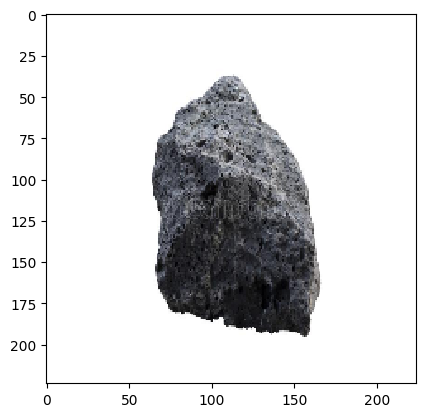

In [64]:
current_image=np.array(img)
current_image = current_image.reshape(224,224,3) 
plt.imshow(current_image, interpolation='nearest')
plt.show()

In [3]:
test_path=r"C:\Users\Shirshak\roorkee_test"
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=[224, 224],
    interpolation='nearest',
)
ds_test = (
    test_ds
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

In [81]:
train_ds

<BatchDataset shapes: ((None, 224, 224, 3), (None, 7)), types: (tf.uint8, tf.float32)>